# Analysis notebook: `SU2020a_CRY_onspill-LH_aw_test`  

## Define analysis name

In [1]:
ana_label = "SU2020a_CRY_onspill-LH_aw_test"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020a_CRY_onspill-LH_aw_test

analysis.csv  events.parquet  info.txt	   SU2020a_CRY_onspill-LH_aw_test.log
cut_flow.csv  hists.h5	      results.pkl  SU2020a_CRY_onspill-LH_aw_test.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020a_CRY_onspill-LH_aw_test


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020a_CRY_onspill-LH_aw_test/info.txt


## Analyse results

### Cut flow

In [6]:
# passEntrance_And_EMinusFit: pass=2960    all=3133    -- eff=94.48 % cumulative eff=94.48 %
# pass_upstream: pass=1363    all=2960    -- eff=46.05 % cumulative eff=43.50 %
# pass_trkpid: pass=392    all=1363    -- eff=28.76 % cumulative eff=12.51 %
# pass_trkqual: pass=199    all=392    -- eff=50.77 % cumulative eff=6.35 %
# pass_t0  : pass=154    all=199    -- eff=77.39 % cumulative eff=4.92 %
# pass_t0err: pass=146    all=154    -- eff=94.81 % cumulative eff=4.66 %
# pass_nactive: pass=135    all=146    -- eff=92.47 % cumulative eff=4.31 %
# pass_d0  : pass=42     all=135    -- eff=31.11 % cumulative eff=1.34 %
# pass_tandip: pass=20     all=42     -- eff=47.62 % cumulative eff=0.64 %
# pass_maxr : pass=17     all=20     -- eff=85.00 % cumulative eff=0.54 %
# pass_crv : pass=0     all=17     -- eff=0.00 % cumulative eff=0.00 %
# pass_ext_mom: pass=0     all=0     -- eff=-nan % cumulative eff=0.00 %
# pass_sig_mom: pass=0     all=0     -- eff=-nan % cumulative eff=0.00 %

# .Filter([](int nactive, float nactive_cut)->bool {
#                             return nactive > nactive_cut; },{"nactive","nactive_cut"},{"pass_nactive"})

In [7]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,3133,100.000,100.000,No selection applied
1,has_trk_front,Preselect,3068,97.925,97.925,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2960,94.478,96.480,Electron track fits
3,one_reco_electron,Preselect,2474,78.966,83.581,One reco electron / event
4,is_downstream,Preselect,1363,43.505,55.093,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,392,12.512,28.760,Track parents are electrons (truth PID)
6,within_t0,Tracker,309,9.863,78.827,t0 at tracker entrance (640 < t_0 < 1650 ns)
7,has_hits,Tracker,296,9.448,95.793,>20 active tracker hits
8,within_d0,Tracker,91,2.905,30.743,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle_lo,Tracker,84,2.681,92.308,Extrapolated pitch angle (pz/pt > 0.5)


In [8]:
# h_nactive = results["hists"]["nactive"]
# # h_nactive = h_nactive[{"selecd
# draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=True)

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()


# # Plot step histograms
# draw._plot_histogram(h_nactive, ax, ["CE-like"], density=False) # , histcolor="r")

# n_entries = h_nactive[{"selection": "CE-like"}].sum(flow=True)
# ax.set_title("After t0err cut")
# ax.set_ylabel("Tracks")
# ax.legend([f"nactive: {int(n_entries)}"], frameon=False)
# plt.tight_layout()
# plt.savefig("nactive.png")
# plt.show()

### Efficiency & rates

In [9]:
display(results["analysis"].round(3))

,Type,CE-like (wide),No veto (wide),CE-like (ext),No veto (ext),CE-like (sig),No veto (sig)
0,k,32,0,3,0,0,0
1,N,50000000,32,50000000,3,50000000,0
2,Eff [%],0.000064,100.0,0.000006,100.0,0.0,0.0
3,Eff Err$-$ [%],-0.00001,-3.030303,-0.000003,-25.0,0.0,0.0
4,Eff Err$+$ [%],0.000012,0.0,0.000005,0.0,0.000002,100.0
5,Rate 1B [$\text{day}^{-1}$],0.725837,0.0,0.905028,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.127012,0.0,-0.490847,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.151526,0.025845,0.875997,0.34374,2.434826,2.434826
8,Rate 2B [$\text{day}^{-1}$],0.554522,0.0,0.691419,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.097034,0.0,-0.374995,0.0,0.0,0.0


### Histograms

In [10]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


In [11]:
# draw._plot_hist(results["hists"]["nactive"])


# h_nactive[{"selection": "CE-like"}].plot1d(
#     ax=ax #, 
#     # yerr=False,
#     # density=density,
#     # color=color,
#     # edgecolor=color,
#     # flow="none",
#     # histtype=histtype,
#     # linewidth=linewidth,
#     # alpha=alpha,
#     # linestyle=linestyle  
# )


[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw_test/h1o_1x3_mom_windows.png


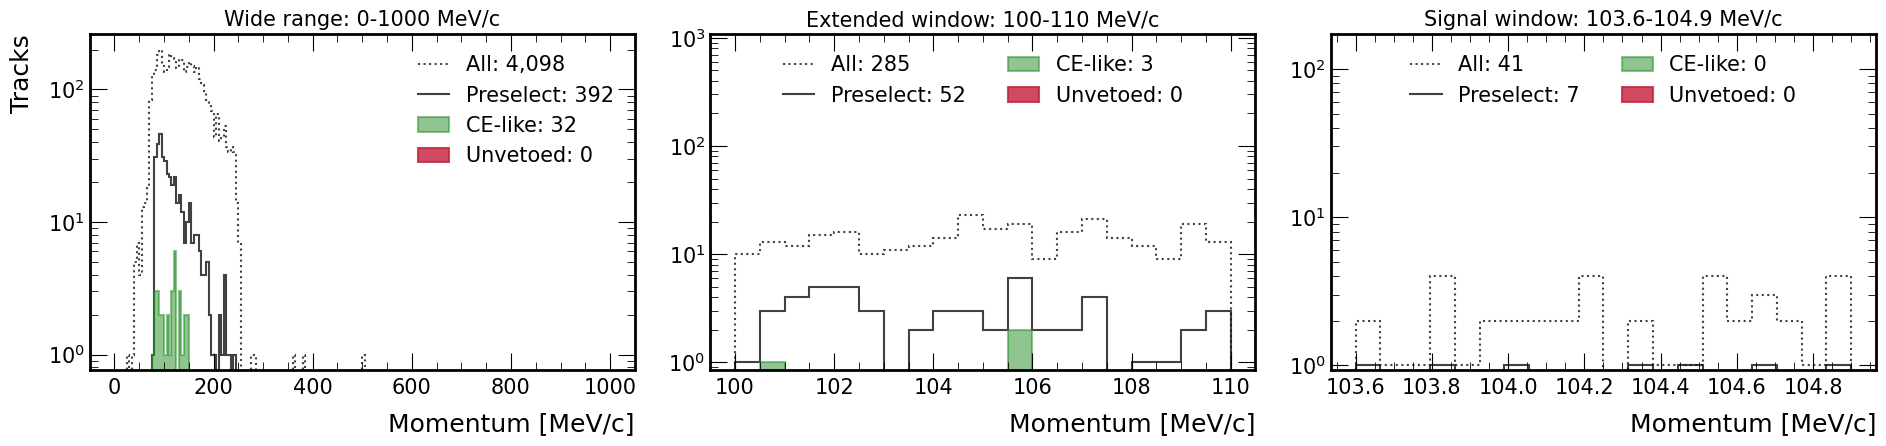

In [12]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw_test/h1o_3x3_summary.png


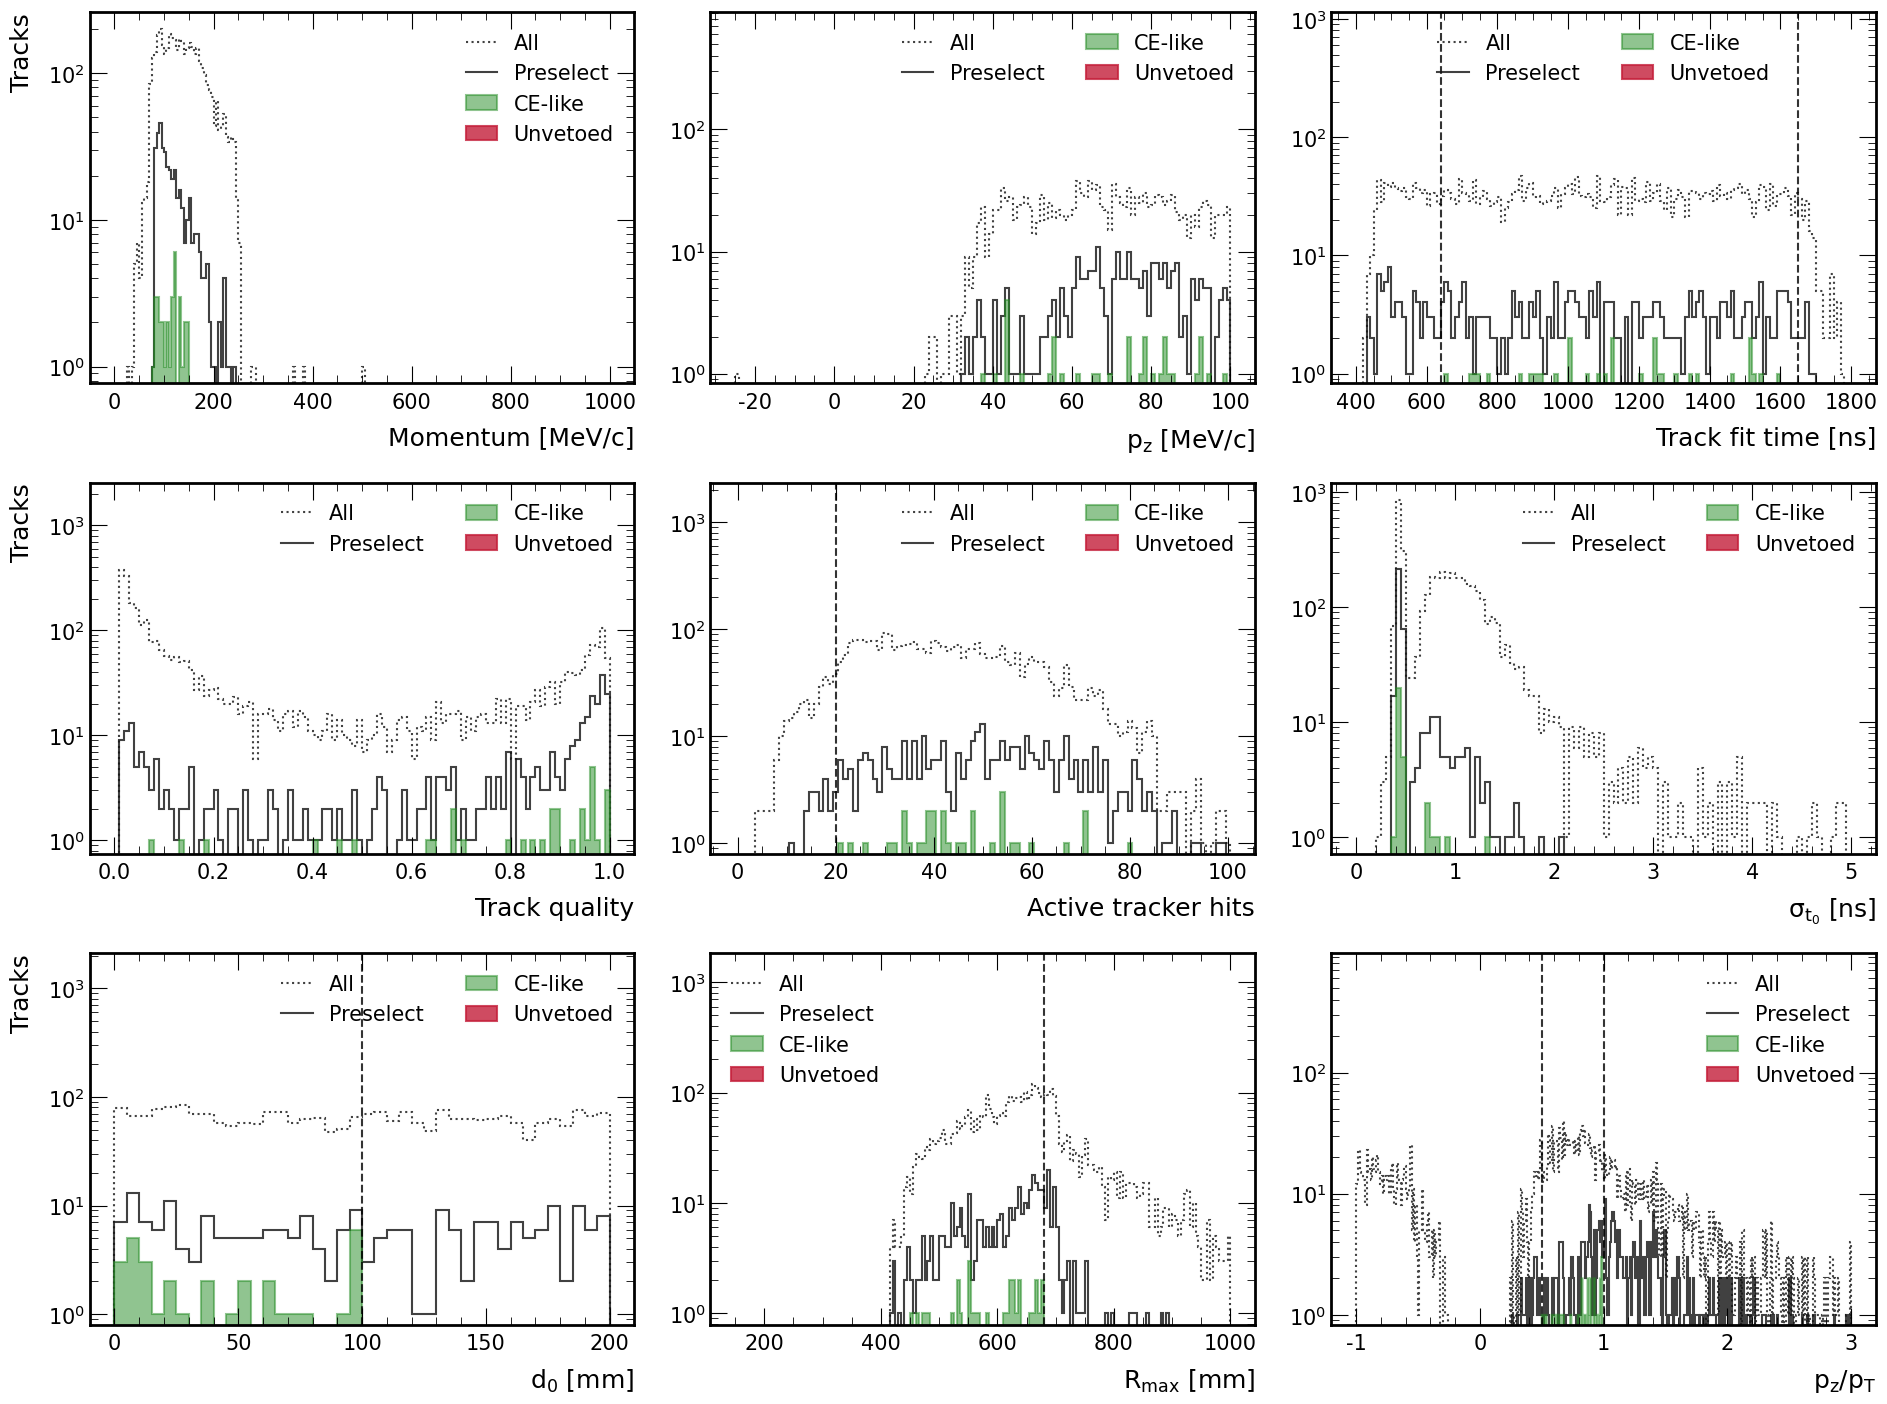

In [13]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw_test/h1o_2x2_mom_summary.png


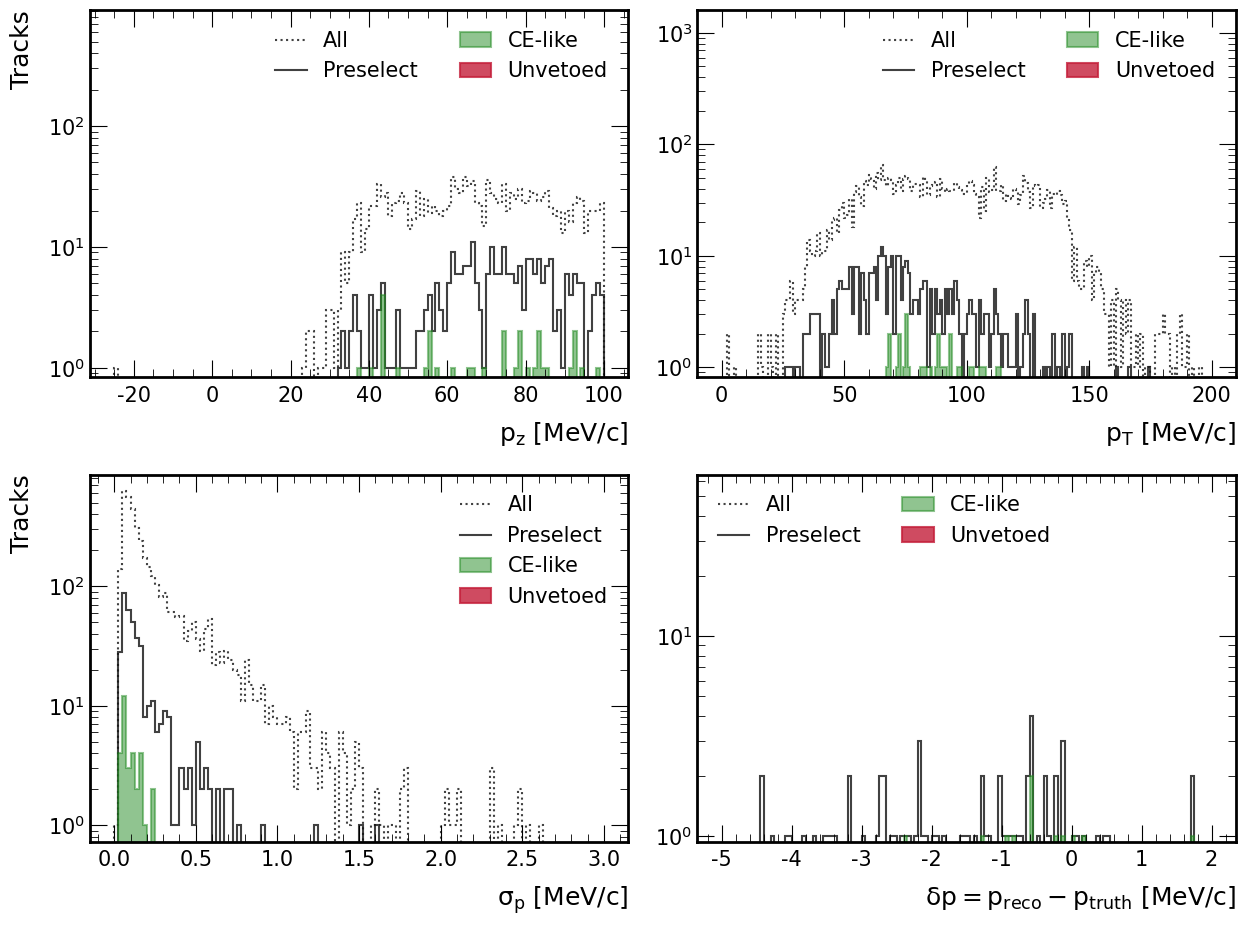

In [14]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw_test/h1o_crv_z.png


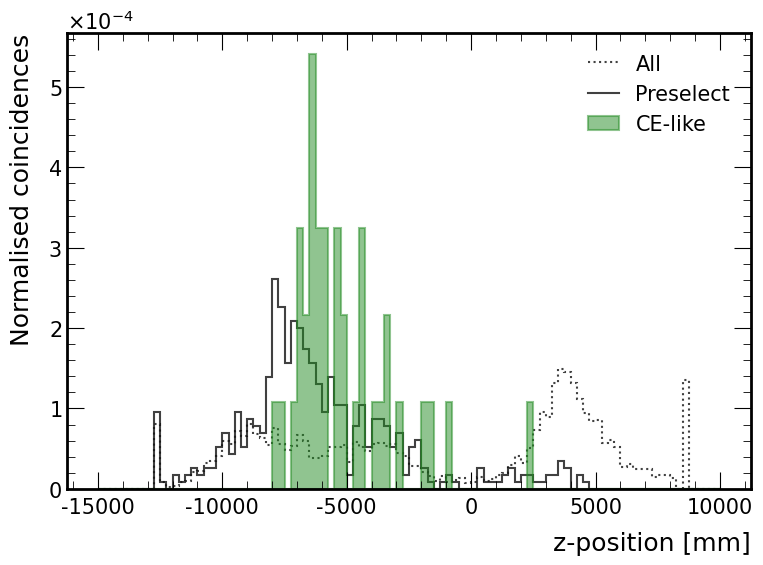

In [15]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [16]:
print(results["event_info"])

In [17]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 0 event(s)...

